<a href="https://colab.research.google.com/github/vedantzope9/ML_mspa/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv('/content/drive/MyDrive/INFY.csv');
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2011-06-29,2868.00,2907.00,2868.0,2880.0,2881.75,600094.0,17320.05
1,2011-06-30,2886.05,2919.00,2881.5,2903.1,2910.45,1417730.0,41163.32
2,2011-07-01,2935.00,2969.95,2924.1,2928.0,2934.15,800308.0,23549.85
3,2011-07-04,2966.65,2977.00,2935.0,2941.0,2938.95,514324.0,15162.29
4,2011-07-05,2957.00,2969.90,2926.0,2959.0,2956.45,802966.0,23701.22


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1863 non-null   object 
 1   Open                  1863 non-null   float64
 2   High                  1863 non-null   float64
 3   Low                   1863 non-null   float64
 4   Last                  1863 non-null   float64
 5   Close                 1863 non-null   float64
 6   Total Trade Quantity  1863 non-null   float64
 7   Turnover (Lacs)       1863 non-null   float64
dtypes: float64(7), object(1)
memory usage: 116.6+ KB


In [46]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1863.000000,1863.000000,1863.000000,1863.00000,1863.000000,1.863000e+03,1863.000000
mean,1962.818760,1983.337064,1942.258320,1962.86766,1963.062641,2.875385e+06,41034.223446
std,961.706168,971.631763,953.680277,963.25318,963.288674,3.595220e+06,39354.103885
min,621.000000,628.000000,599.850000,619.50000,619.100000,2.169400e+04,609.810000
25%,1053.975000,1063.075000,1043.025000,1054.75000,1054.175000,1.009240e+06,23993.260000
50%,2030.000000,2051.550000,2002.150000,2022.20000,2020.900000,2.017724e+06,33154.160000
75%,2781.000000,2806.300000,2752.050000,2781.52500,2785.300000,3.505464e+06,46187.235000
max,4387.000000,4402.200000,4343.400000,4369.50000,4365.900000,8.220248e+07,826850.680000


In [47]:
df['Date']=pd.to_datetime(df['Date'])

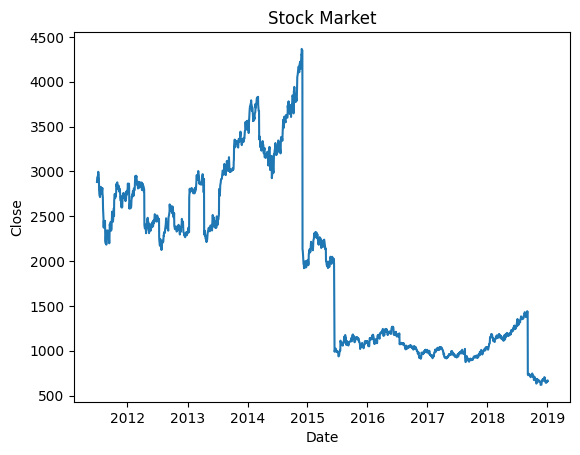

In [48]:
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Stock Market')
plt.show()

In [49]:
X= np.array(df.index).reshape(-1,1)
y = df['Close']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [58]:
scaler=StandardScaler().fit(X_train)

In [59]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

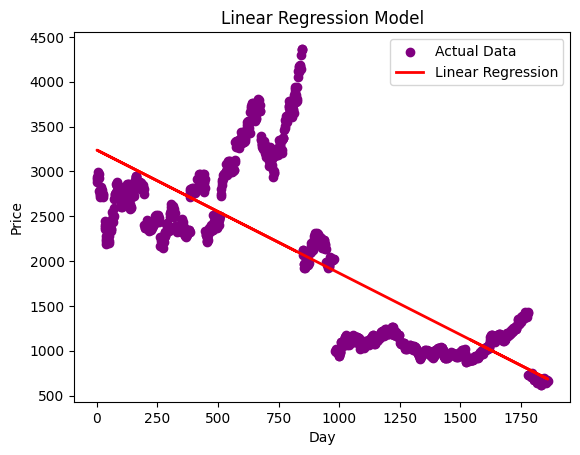

In [60]:
y_pred = lm.predict(X)
plt.scatter(X_train, y_train, color='purple', label='Actual Data')
plt.plot(X_train, lm.predict(X_train), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression Model')
plt.show()


In [61]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, lm.predict(X_train))
mse_test=mean_squared_error(y_test,lm.predict(X_test))

In [62]:
from sklearn.metrics import r2_score
r2_train= r2_score(y_train, lm.predict(X_train))
r2_test=r2_score(y_test,lm.predict(X_test))

In [63]:
print("Metric \t\t Train \t\t\t Test")
print("r2_score \t",r2_train,"\t",r2_test)
print("MSE \t\t",mse_train,"\t",mse_test)

Metric 		 Train 			 Test
r2_score 	 0.5899059522374404 	 0.5535791504736418
MSE 		 380788.3820374122 	 410487.2514524849
